In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [20, 20]
pd.set_option("precision", 5)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('talent_grades.csv')

In [3]:
data.head()

,Name,Alternate Name,Position,Team,Minutes,Age,Height,Weight,Offensive Role,Perimeter Shot,Grade,Off-Ball Movement,Grade.1,One on One,Grade.2,Finishing,Grade.3,Roll Gravity,Grade.4,Playmaking,Grade.5,Post Play,Grade.6,Perimeter Defense,Grade.7,Interior Defense,Grade.8,OReb,Grade.9,DReb,Grade.10,Usage,Grade.11,Self Creation,Grade.12,Year,Advanced Position
0,Kevin Durant,Kevin Durant,SF,OKC,"3,937",25.0,9-Jun,240,Tall Creators,0.992,A,0.705,B,1.000,A,0.991,A,0.927,A,0.967,A,0.948,A,0.632,B-,0.703,B,0.410,C-,0.948,A,0.983,High,0.5545,High,2013-14,Wing
1,Paul George,Paul George,SF,IND,"3,679",24.0,9-Jun,220,Secondary Creators,0.902,A,0.958,A,0.931,A,0.793,B+,0.857,A-,0.836,A-,0.353,D+,0.840,A-,0.786,B+,0.327,D,0.859,A-,0.954,High,0.4998,Medium,2013-14,Wing
2,Lebron James,LeBron James,PF,MIA,"3,665",29.0,8-Jun,250,Tall Creators,0.909,A,0.809,A-,0.994,A,0.998,A,0.942,A,0.976,A,0.967,A,0.741,B+,0.652,B-,0.439,C-,0.867,A-,0.981,High,0.6885,High,2013-14,Wing
3,Lance Stephenson,Lance Stephenson,SG,IND,"3,457",23.0,5-Jun,230,Tall Creators,0.718,B,0.665,B,0.940,A,0.978,A,0.403,C-,0.949,A,0.644,B-,0.418,C-,0.628,B-,0.571,C+,0.812,A-,0.829,Medium,0.5318,High,2013-14,Wing
4,Nicolas Batum,Nicolas Batum,SF,POR,"3,415",25.0,8-Jun,200,Secondary Creators,0.782,B+,0.975,A,0.952,A,0.937,A,0.775,B+,0.944,A,0.857,A-,0.491,C,0.575,C+,0.584,C+,0.919,A,0.799,Medium,0.3619,Medium,2013-14,Wing


In [4]:
data = data.iloc[:2973]

In [5]:
data.shape

(2973, 37)

In [6]:
non_numeric = data.drop(['Perimeter Shot','Off-Ball Movement','One on One','Finishing','Roll Gravity','Playmaking','Post Play','Perimeter Defense','Interior Defense','OReb','DReb','Usage','Self Creation'], axis = 1)
numeric = data[['Perimeter Shot','Off-Ball Movement','One on One','Finishing','Roll Gravity','Playmaking','Post Play','Perimeter Defense','Interior Defense','OReb','DReb','Usage','Self Creation']]

In [7]:
numeric.head()

,Perimeter Shot,Off-Ball Movement,One on One,Finishing,Roll Gravity,Playmaking,Post Play,Perimeter Defense,Interior Defense,OReb,DReb,Usage,Self Creation
0,0.992,0.705,1.000,0.991,0.927,0.967,0.948,0.632,0.703,0.410,0.948,0.983,0.5545
1,0.902,0.958,0.931,0.793,0.857,0.836,0.353,0.840,0.786,0.327,0.859,0.954,0.4998
2,0.909,0.809,0.994,0.998,0.942,0.976,0.967,0.741,0.652,0.439,0.867,0.981,0.6885
3,0.718,0.665,0.940,0.978,0.403,0.949,0.644,0.418,0.628,0.571,0.812,0.829,0.5318
4,0.782,0.975,0.952,0.937,0.775,0.944,0.857,0.491,0.575,0.584,0.919,0.799,0.3619


In [8]:
#normalize the numerical data
numeric_normalized = (numeric - numeric.mean()) / (numeric.max() - numeric.min())

In [9]:
#recombine the categorical and numerical data
data_normalized = pd.concat([non_numeric,numeric_normalized], axis = 1)

In [10]:
data_normalized.tail()

,Name,Alternate Name,Position,Team,Minutes,Age,Height,Weight,Offensive Role,Grade,Grade.1,Grade.2,Grade.3,Grade.4,Grade.5,Grade.6,Grade.7,Grade.8,Grade.9,Grade.10,Grade.11,Grade.12,Year,Advanced Position,Perimeter Shot,Off-Ball Movement,One on One,Finishing,Roll Gravity,Playmaking,Post Play,Perimeter Defense,Interior Defense,OReb,DReb,Usage,Self Creation
2968,Gary Trent Jr.,Gary Trent Jr.,SF,POR,0,NaN,6-Jun,205,Secondary Creators,D,F,F,F,D-,F,F,D-,D+,D-,F,Low,High,2018-19,Wing,-0.22205,-0.35489,-0.3735,-0.48646,-0.2766,-0.40327,-0.46045,-0.30129,-0.15005,-0.29792,-0.42060,-0.32052,0.16842
2969,Mitchell Creek,Mitchell Creek,SF,BRK,0,NaN,6-Jun,225,NaN,F,F,F,F,D-,D-,F,F,D-,B,F,Low,Low,2018-19,Wing,-0.40805,-0.35689,-0.4095,-0.48646,-0.2916,-0.26292,-0.46045,-0.38243,-0.24003,0.18305,-0.47170,-0.26040,-0.29041
2970,Lonnie Walker IV,Lonnie Walker IV,SF,SAS,0,NaN,5-Jun,205,Primary Creators,D,F,D+,F,F,F,F,D-,C-,F,B-,Low,High,2018-19,Wing,-0.18605,-0.41789,-0.1555,-0.48646,-0.3526,-0.30833,-0.46045,-0.28127,-0.06620,-0.46726,0.14453,-0.06902,0.22665
2971,Vincent Edwards,Vincent Edwards,SF,HOU,0,NaN,8-Jun,225,Spot-up Wings,F,F,F,F,F,F,F,F,F,F,F,Low,Low,2018-19,Wing,-0.31105,-0.47789,-0.5005,-0.48646,-0.4986,-0.41050,-0.46045,-0.43301,-0.32080,-0.37607,-0.46168,-0.18625,-0.29041
2972,DJ Stephens,DJ Stephens,SF,NaN,0,NaN,5-Jun,188,NaN,F,F,F,F,F,F,D,F,F,F,F,Low,High,2018-19,Wing,-0.49805,-0.49189,-0.5005,-0.48646,-0.3716,-0.41669,-0.20945,-0.35925,-0.43021,-0.48229,-0.48874,-0.25339,0.30963


In [11]:
data_normalized = data_normalized.reset_index()

In [12]:
data_normalized = data_normalized.drop(['index'], axis = 1)

In [13]:
data_normalized['UniqueID'] = data_normalized['Name'] + data_normalized ['Year']

In [14]:
#First we will store the player names into an array
player = data_normalized.UniqueID

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

PCA_data = StandardScaler(with_std=False).fit_transform(
    numeric_normalized)




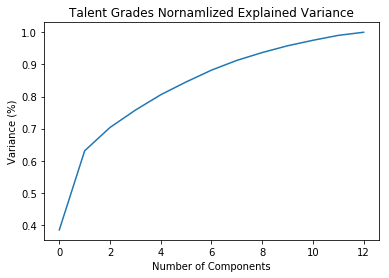

In [16]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(numeric_normalized)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Talent Grades Nornamlized Explained Variance')
plt.show()

In [17]:
estimator_pca = PCA(n_components=5)#
normalized_PCA = estimator_pca.fit_transform(PCA_data)

In [18]:
estimator_pca.explained_variance_ratio_.sum()

0.8054863672928823

In [40]:
normalized_PCA_df = pd.DataFrame(normalized_PCA, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
normalized_PCA_df["name"] = player
normalized_PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,name
0,-1.23300,0.54368,-0.10523,0.03852,0.26156,Kevin Durant2013-14
1,-0.89772,0.64542,0.04513,0.31924,-0.22955,Paul George2013-14
2,-1.25137,0.58044,-0.13747,-0.02420,0.16011,Lebron James2013-14
3,-0.76265,0.46228,-0.26605,0.10390,0.10342,Lance Stephenson2013-14
4,-1.08208,0.37764,0.02005,0.13867,0.08870,Nicolas Batum2013-14


In [20]:
normalized_PCA_df.to_csv('PCA.csv',index=False)

In [21]:
from bokeh.io import output_notebook

from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool

output_notebook()

Loading BokehJS ...

In [22]:
normalized_PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,name
0,-1.23300,0.54368,-0.10523,0.03852,0.26156,Kevin Durant2013-14
1,-0.89772,0.64542,0.04513,0.31924,-0.22955,Paul George2013-14
2,-1.25137,0.58044,-0.13747,-0.02420,0.16011,Lebron James2013-14
3,-0.76265,0.46228,-0.26605,0.10390,0.10342,Lance Stephenson2013-14
4,-1.08208,0.37764,0.02005,0.13867,0.08870,Nicolas Batum2013-14


In [23]:
source = ColumnDataSource(normalized_PCA_df)

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
    ("name", "@name"),
])

p = figure(plot_width=500, plot_height=500, 
           tools=[hover,"box_zoom", "pan", "zoom_out", "zoom_in"],
           title="2 Principal Components for the NBA data")

p.circle("PC1", "PC2", size=10, source=source, fill_alpha=0.5)

show(p);

In [24]:
from sklearn.cluster import KMeans

In [25]:
normalized_PCA_df_no_name = normalized_PCA_df.drop(['name'], axis = 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_PCA_df_no_name)
    Sum_of_squared_distances.append(km.inertia_)

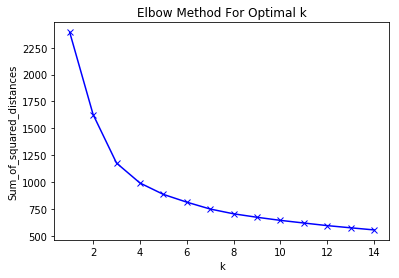

In [28]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
estimator_kmeans = KMeans(random_state=42, n_clusters=8)

estimator_kmeans.fit(normalized_PCA_df_no_name)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [30]:
estimator_kmeans.predict(normalized_PCA_df_no_name)

array([6, 5, 6, ..., 3, 3, 3], dtype=int32)

In [31]:
clusters = estimator_kmeans.labels_
clusters

array([6, 5, 6, ..., 3, 3, 3], dtype=int32)

In [32]:
centroids = estimator_kmeans.cluster_centers_
centroids

array([[ 3.92881326e-01, -4.50474890e-01,  4.85071794e-02,
         2.30427987e-02,  3.83961993e-02],
       [-3.08907687e-01, -7.28611294e-02,  2.24313783e-01,
        -9.56972611e-03,  1.03547418e-01],
       [ 1.86292404e-01,  3.42339811e-01,  3.23956144e-01,
         1.06934214e-01, -7.27938991e-02],
       [ 1.13526656e+00, -1.12241897e-01, -5.69458511e-02,
        -4.82079114e-02,  4.34393399e-02],
       [-4.06518000e-01, -7.14325975e-01, -8.08841168e-02,
         9.43142385e-04, -9.96827505e-02],
       [-3.28705470e-01,  6.38153125e-01, -2.09892125e-02,
        -9.84312892e-02, -3.31749336e-02],
       [-8.46099356e-01,  6.52590781e-02, -1.53901752e-01,
        -1.24697571e-02,  8.05846217e-02],
       [ 3.43703265e-01,  4.62887307e-01, -2.70328022e-01,
         6.39907012e-02, -4.19509442e-02]])

In [33]:
from sklearn.metrics import euclidean_distances

In [34]:
centroid_distances = euclidean_distances(centroids)
centroid_distances

array([[0.        , 0.81933887, 0.87550401, 0.82568749, 0.86310658,
        1.31548721, 1.35833171, 0.97285007],
       [0.81933887, 0.        , 0.68717755, 1.47356811, 0.74536146,
        0.76986763, 0.67174011, 0.99205789],
       [0.87550401, 0.68717755, 0.        , 1.13572094, 1.28211525,
        0.71795562, 1.18690224, 0.62871216],
       [0.82568749, 1.47356811, 1.13572094, 0.        , 1.66225078,
        1.64802664, 1.99232902, 1.011315  ],
       [0.86310658, 0.74536146, 1.28211525, 1.66225078, 0.        ,
        1.36130102, 0.9159653 , 1.41133271],
       [1.31548721, 0.76986763, 0.71795562, 1.64802664, 1.36130102,
        0.        , 0.79617861, 0.75596255],
       [1.35833171, 0.67174011, 1.18690224, 1.99232902, 0.9159653 ,
        0.79617861, 0.        , 1.26813041],
       [0.97285007, 0.99205789, 0.62871216, 1.011315  , 1.41133271,
        0.75596255, 1.26813041, 0.        ]])

In [35]:
normalized_PCA_df["cluster"] = clusters

In [36]:
normalized_PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,name,cluster
0,-1.23300,0.54368,-0.10523,0.03852,0.26156,Kevin Durant2013-14,6
1,-0.89772,0.64542,0.04513,0.31924,-0.22955,Paul George2013-14,5
2,-1.25137,0.58044,-0.13747,-0.02420,0.16011,Lebron James2013-14,6
3,-0.76265,0.46228,-0.26605,0.10390,0.10342,Lance Stephenson2013-14,6
4,-1.08208,0.37764,0.02005,0.13867,0.08870,Nicolas Batum2013-14,6


In [37]:
normalized_PCA_df.to_csv('with_clusters.csv',index=False)

TRY 3D

In [38]:
from mpl_toolkits.mplot3d import Axes3D


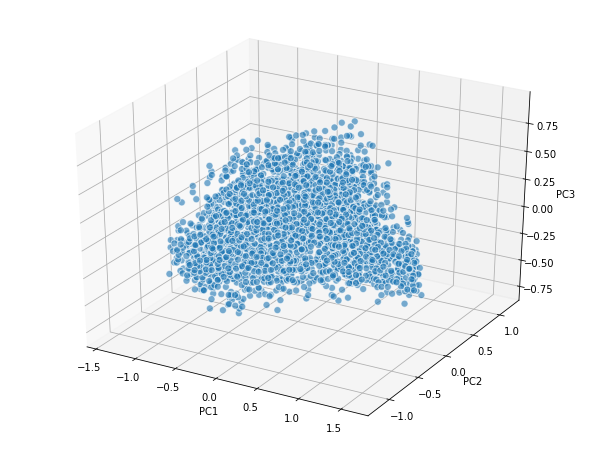

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

xs = normalized_PCA_df['PC1']
ys = normalized_PCA_df['PC2']
zs = normalized_PCA_df['PC3']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()